In [3]:
# %load deep_import.py
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [4]:
# mnist  자료 가져옴
from tensorflow.keras.datasets import mnist

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
X_train = X_train.astype('float64') /255
X_test = X_test.astype('float64') /255

In [7]:
# 데이터 정규화,  카테고리 데이터 변환
# 모델 설계, 모델 실행
# 테스트 데이터로 모델 정확도 확인
# 검증과 학습 손실함수의 결과를 그래프로 표현

In [8]:
model = Sequential(Flatten(input_shape=(28, 28)))
model.add(Dense(1024,activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 10)                10250     
                                                                 
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


In [13]:
model = Sequential([Flatten(input_shape=(28, 28)),Dense(1024,activation='relu'),
    (Dense(10, activation='softmax'))]

SyntaxError: unexpected EOF while parsing (2421085353.py, line 2)

In [14]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 53s 26ms/step - loss: 0.1851 - accuracy: 0.9447
Epoch 2/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0738 - accuracy: 0.9770
Epoch 3/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0485 - accuracy: 0.9844
Epoch 4/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0338 - accuracy: 0.9889
Epoch 5/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0251 - accuracy: 0.9919


In [15]:
#  정확도 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print('테스트 정확도:', test_acc)

313/313 [==============================] - 3s 7ms/step - loss: 0.0753 - accuracy: 0.9783
테스트 정확도: 0.9782999753952026


In [16]:
loss, accuracy = [], []
for i in range(10):
    model.fit(X_train, y_train, epochs=1)
    loss.append(model.evaluate(X_test, y_test)[0])
    accuracy.append(model.evaluate(X_test, y_test)[1])

print(accuracy)

313/313 [==============================] - 2s 7ms/step - loss: 0.0975 - accuracy: 0.9825
[0.9797999858856201, 0.9787999987602234, 0.9758999943733215, 0.9822999835014343, 0.9811999797821045, 0.9793999791145325, 0.9811000227928162, 0.9803000092506409, 0.9801999926567078, 0.9825000166893005]


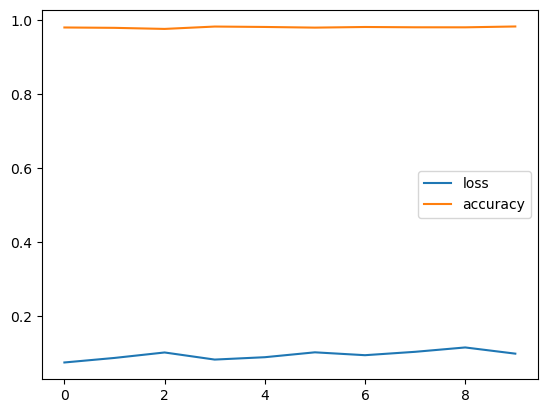

In [17]:
x_len = np.arange(len(loss))
plt.plot(x_len, loss, label='loss')
plt.plot(x_len, accuracy, label='accuracy')
plt.legend()
plt.show()

In [62]:
# 딥러닝 실행 후 테스트 정확도 결과 확인
# 클래스 확인
# 0 : T-shirt/top, 1 : Trouser, 2 : Pullover, 3 : Dress, 4 : Coat, 5 : Sandal
# 6 : Shirt, 7 : Sneaker, 8 : Bag, 9 : Ankel boot
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


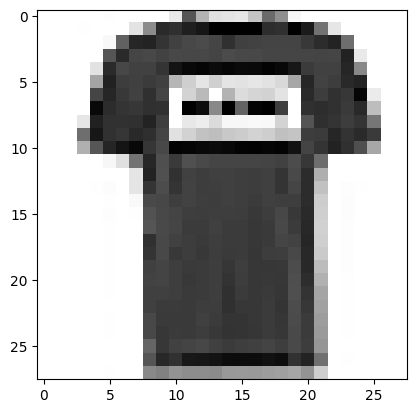

In [65]:
plt.imshow(X_train[1], cmap='Greys')